# Email CLassification Project using NLTK
This notebook was created by Hamas ur Rehman, Machine Learning and AI course student from Skill4U NIC Peshawar



## Details about the DataSet

This dataset was taken from Kaggle
[https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset](https://www.kaggle.com/datasets/nitishabharathi/email-spam-dataset)

This dataset contains 3 csv files each file contains 2 columns.

- The first column is the body of the email
- The second column contains our labels 
  - 0 for **Not Spam**
  - 1 for **Spam**

### Total values of the dataset
The combined values of all 3 files is  `18650`

In [64]:
# importing necessary files
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# importing all of our models 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hamas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hamas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hamas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
data1 = pd.read_csv('dataset/completeSpamAssassin.csv')
data2 = pd.read_csv('dataset/enronSpamSubset.csv')
data3 = pd.read_csv('dataset/lingSpam.csv')

In [35]:
data1.drop('Unnamed: 0',inplace=True,axis=1)
data2.drop(['Unnamed: 0','Unnamed: 0.1'],inplace=True,axis=1)
data3.drop('Unnamed: 0',inplace=True,axis=1)

In [37]:
#Shuffle data3
data3 = data3.sample(frac = 1)
# resetting the index 
data3.reset_index(drop=True, inplace=True)

In [39]:
testing_data = data3.loc[1500:]
data3 = data3.drop(np.array(range(1500,2604)),axis = 0)

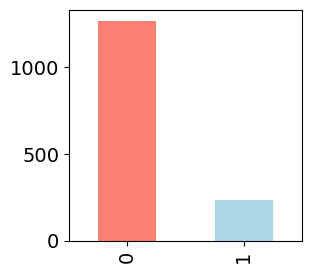

0    1266
1     235
Name: Label, dtype: int64

In [40]:
fig = plt.figure(figsize =(3,3))
data3.Label.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.tick_params(labelsize=14)
plt.show()
data3.Label.value_counts()

We will consider the 3rd csv file as our testing data

## BALANCING DATA

As the data shown in the graph below tells us that the data is not balanced we will first try to fix this issue

#### BEFORE BALANCED DATA

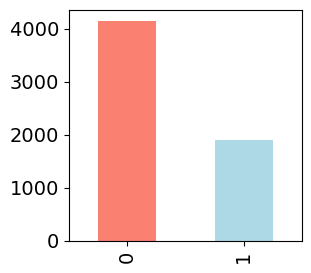

0    4150
1    1896
Name: Label, dtype: int64

In [41]:
fig = plt.figure(figsize =(3,3))
data1.Label.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.tick_params(labelsize=14)
plt.show()
data1.Label.value_counts()

In [42]:
temp_data = data1.drop(data1[data1.Label == 1].index)
data1.drop(data1[data1.Label == 0].index , inplace = True)
temp_data = temp_data.sample(frac = 1)
temp_data.reset_index(drop=True, inplace=True)
temp_data = temp_data.drop(np.array(range(0, 2254)),axis = 0)
data1 = pd.concat([data1,temp_data], axis=0)


#### AFTER BALANCED DATA

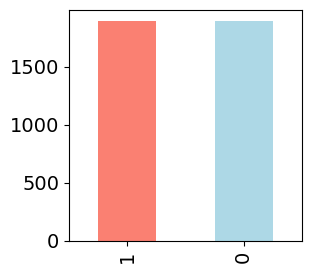

1    1896
0    1896
Name: Label, dtype: int64

In [43]:
fig = plt.figure(figsize =(3,3))
data1.Label.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.tick_params(labelsize=14)
plt.show()
data1.Label.value_counts()

## Combining our datasets into one
We are combinning them so it is easy for us to clean and work with our data

In [44]:
df = pd.concat([data1, data2,data3], axis=0)
df.sort_index(inplace=True)

## Shuffling our data

In [45]:
df = df.sample(frac = 1)
# resetting the index 
df.reset_index(drop=True, inplace=True)

## Total spam vs ham Ratio

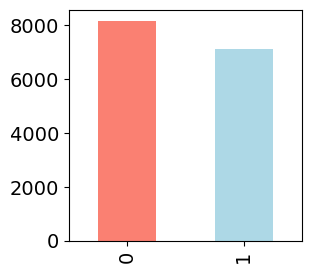

0    8162
1    7131
Name: Label, dtype: int64

In [46]:
plt.figure(figsize=(3,3))
df.Label.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.tick_params(labelsize=14)
plt.show()
df.Label.value_counts()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15293 entries, 0 to 15292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    15292 non-null  object
 1   Label   15293 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 239.1+ KB


In [48]:
df.isnull().sum()

Body     1
Label    0
dtype: int64

so we see that there is only one missing value in the body we can remove it

In [49]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15292 entries, 0 to 15292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    15292 non-null  object
 1   Label   15292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 358.4+ KB


## Removing links from the dataset body column

In [50]:
no_link = [re.sub(r'http\S+', '', i) for i in df["Body"]]
no_link_test = [re.sub(r'http\S+', '', i) for i in testing_data["Body"]]

## Removing unncessary symbols from our body column 

In [51]:
clean = [re.sub('[^a-zA-Z0-9 ]', '', i) for i in no_link]
clean_test = [re.sub('[^a-zA-Z0-9 ]', '', i) for i in no_link_test]

## Changing all the text into lower case

In [52]:
lower = [i.lower() for i in clean]
lower_test = [i.lower() for i in clean_test]

## Performing word Tokenization using NLTK library

In [53]:
tokens = [nltk.word_tokenize(w) for w in lower]
tokens_test = [nltk.word_tokenize(w) for w in lower_test]

## Using Lemmatization to remove different forms of the same words

In [54]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
lemmatized = [[lemma.lemmatize(w) for w in text] for text in tokens]
lemma_test = WordNetLemmatizer()
lemmatized_test = [[lemma_test.lemmatize(w) for w in text] for text in tokens_test]

## Removing Stopwords from our data

In [55]:
from nltk.corpus import stopwords
without_stopwords = [[w for w in text if w not in stopwords.words('english')] for text in lemmatized]
without_stopwords_test = [[w for w in text if w not in stopwords.words('english')] for text in lemmatized_test]

## Vectorizing our data By bag of words method

In [56]:
vectorizer = CountVectorizer(max_features=20000)
X = vectorizer.fit_transform([' '.join(text) for text in without_stopwords]).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
vectorizer_test = CountVectorizer(max_features=20000)
TESTDATA = vectorizer_test.fit_transform([' '.join(text) for text in without_stopwords_test]).toarray()
TESTDATA

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Splitting our data to train test split

In [62]:
y = np.array(df['Label'])
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.1)
x_train.shape

(13762, 20000)

In [65]:
y_TESTDATA = np.array(testing_data['Label'])

In [71]:
# Put models in a dictionary
models = {"Multinomial NB model": MultinomialNB(),          
          "Random Forest": RandomForestClassifier(),
          "SVC": SVC(),
          "Gaussian NB model" : GaussianNB(),
          "LogisticRegression": LogisticRegression(), 
          "KNeighborsClassifier":KNeighborsClassifier(),
          "DecisionTreeClassifier":DecisionTreeClassifier()
         }

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test, TESTDATA,y_TESTDATA):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores_validation = {}
    model_scores_test = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores_validation[name] = model.score(x_test, y_test) *100
        model_scores_test[name] = model.score(TESTDATA, y_TESTDATA) *100
        
    return model_scores_validation,model_scores_test

In [72]:
model_scores_validation,model_scores_test = fit_and_score(models,x_train,x_test,y_train,y_test,TESTDATA,y_TESTDATA)

In [74]:
model_scores_test

{'Multinomial NB model': 47.511312217194565,
 'Random Forest': 48.77828054298642,
 'SVC': 51.49321266968325,
 'Gaussian NB model': 55.38461538461539,
 'LogisticRegression': 48.05429864253394,
 'KNeighborsClassifier': 26.5158371040724,
 'DecisionTreeClassifier': 28.687782805429862}

## Compairing the models

<Figure size 200x200 with 0 Axes>

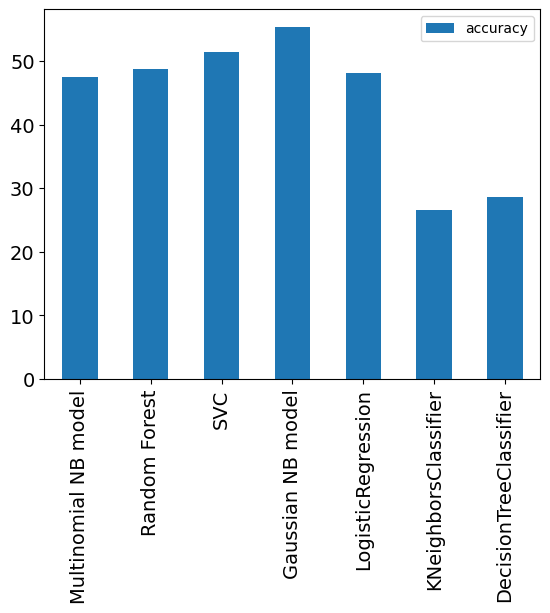

In [75]:
plt.figure(figsize=(2,2))
model_compare = pd.DataFrame(model_scores_test, index=['accuracy'])
model_compare.T.plot.bar()
plt.tick_params(labelsize=14)
plt.show()

## Using the best model for further trainning and tunning

### Tuning a model with GridSearchCV

GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [81]:
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=1000)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.79469667e-01, 9.59360829e-01, 9.39664831e-01,
       9.20373200e-01, 9.01477631e-01, 8.82969996e-01, 8.64842328e-01,
       8.47086827e-01, 8.29695852e-01, 8.12661920e-01, 7.95977700e-01,
       7.79636013e-01, 7.63629826e-01, 7.47952252e-01, 7.32596543e-01,
       7.17556092e-01, 7.02824426e-01, 6.88...
       1.61141428e-09, 1.57833141e-09, 1.54592774e-09, 1.51418933e-09,
       1.48310251e-09, 1.45265393e-09, 1.42283046e-09, 1.39361927e-09,
       1.36500781e-09, 1.33698374e-09, 1.30953502e-09, 1.28264983e-09,
       1.25631660e-09, 1.23052400e-09, 1.20526094e-09, 1.18051653e-09,
       1.15628013e-09, 1.13254132e-09, 1.10928986e-09, 1.08651577e-09,
       1.06420924e-09, 1.04236067e-09, 1.02096066e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [82]:
# PRINTING OUT THE BEST PARAMETERS
gs_NB.best_params_

{'var_smoothing': 5.479472336900293e-07}

In [85]:
model = GaussianNB(var_smoothing = 5.479472336900293e-07)
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
print(f"Our Best Model Score on the Validation Data : {score*100: .2f} % ")

Our Best Model Score on the Validation Data :  90.07 % 


In [95]:
y_preds = model.predict(x_test)

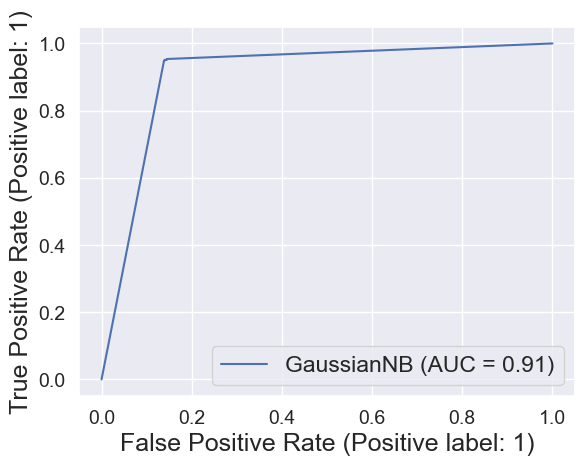

In [96]:
# Import ROC curve function from metrics module
from sklearn.metrics import RocCurveDisplay

# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(model,x_test,y_test)
plt.tick_params(labelsize=14)

plt.show()

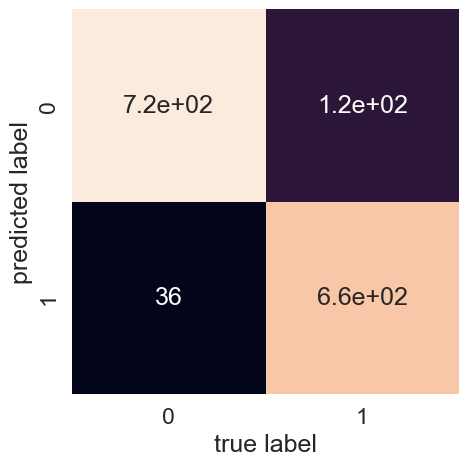

In [97]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")

sns.set(font_scale=1.5)
plt.show()

In [98]:
from sklearn.metrics import classification_report
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       838
           1       0.85      0.95      0.90       692

    accuracy                           0.90      1530
   macro avg       0.90      0.90      0.90      1530
weighted avg       0.91      0.90      0.90      1530



In [99]:
from joblib import dump,load
dump(model, filename= 'spam_classifier_with_NLTK.joblib')

['spam_classifier_with_NLTK.joblib']

In [100]:
loadmodel = load('spam_classifier_with_NLTK.joblib')

In [128]:
loadmodel.predict(x_test[0].reshape(1,-1))

array([1], dtype=int64)

## Predicting one value using our model

In [315]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import re
import nltk
nltk.download('punkt');
nltk.download('wordnet');
nltk.download('omw-1.4');
nltk.download('stopwords');
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from joblib import load
from IPython.display import clear_output

clear_output()
def predict_email(email_input):
    no_link = [re.sub(r'http\S+', '', i) for i in email_input["Body"]]
    clean = [re.sub('[^a-zA-Z0-9 ]', '', i) for i in no_link]
    lower = [i.lower() for i in clean]
    tokens = [nltk.word_tokenize(w) for w in lower]
    lemma = WordNetLemmatizer()
    lemmatized = [[lemma.lemmatize(w) for w in text] for text in tokens]
    without_stopwords = [[w for w in text if w not in stopwords.words('english')] for text in lemmatized]
    vectorizer = CountVectorizer(max_features=20000)
    X = vectorizer.fit_transform([' '.join(text) for text in without_stopwords]).toarray()
    X = np.pad(X, ((0, 0), (0,  20000 - X.shape[1])))
    loadmodel = load('spam_classifier_with_NLTK.joblib')    
    if(loadmodel.predict(X) == 0):
        print("Email is not spam")
        print(loadmodel.predict(X))
    else:
        print("Email is spam !!!")
        print(loadmodel.predict(X))
        
def check_email():
    '''This function is used to predict whether an email is spam or not using the email_spam classifier model.
        it doesnt take in a parameter but a input prompt is shown
        Just simply pass in the body of the email and you will get a prediciton of whether email classifies as spam or not
    '''
    data = input("Enter body of the email: ")
    clear_output(wait = True)
    email_input = pd.DataFrame([data], columns=['Body'])
    prediction = predict_email(email_input)
    
def check_email_variable(data):
    '''This function is used to predict whether an email is spam or not using the email_spam classifier model.
        It only takes in one parameter by passing it into it :
        Body.
        Just simply pass in the body of the email and you will get a prediciton of whether email classifies as spam or not
    '''
    email_input = pd.DataFrame([data], columns=['Body'])
    prediction = predict_email(email_input)

In [316]:
# We have below two emails to test out

email1 = """'Subject: ijcai95 workshop on context in nlp\n \n call for papers ijcai-95 workshop on context in natural language processing august 19 , 20 , or 21 , 1995 montreal , canada correct interpretation of natural language utterances and texts requires linguistic and non-linguistic context . the goal of this workshop is to investigate the nature of context in natural language , its role in natural language processing , and shed some light on this largely unexplored area of great theoretical and practical importance . dialogue and text processing are two application domains where the lack of good theories of context impedes significant progress in applying and developing new technologies . as speech technology matures , it becomes technically feasible to build dialogue systems . however , understanding dialogues , and especially multimodal dialogues , is not possible without some account of the role of context . similarly , with today \'s text processing technology it is feasible to automatically create knowledge bases from fairly unconstrained texts such as newspaper archives . ignoring context in such texts , however , results in knowledge bases that are not only very incomplete , but also dramatically different from knowledge bases created by humans , based on the same texts . we invite papers from researchers active in the fields of natural language processing , knowledge representation , and other related areas addressing theoretical aspects of context and their implications for designing practical nlp systems . we are interested in reports on implemented nlp systems utilizing contextual information . we are also interested in knowledge representation systems , inference methods , and algorithms that would allow one to computationally handle specific aspects of context . agenda : our workshop will provide answers and insights into how to go about answering a number of questions , including the following : i : role of context in natural language what is context ? what is " context of the previous utterance / sentence " " context of the dialog-so - far / text-so - far " and what is the relationship between them ? how many different contexts are there ? what makes two contexts different ? what is the relationship between formalization of context and natural language ideas of context ? what is the status of context in a formal representation aiming at truthfully capturing all the characteristics of natural language ? is context an inherent characteristic of natural language that ultimately decides the formal power of natural language ? is natural language minus context a less powerful formal language ? does representing context and truthfully capturing characteristics of natural language require new knowledge representation or automated reasoning systems ? what is the relationship between context , and the semantics and pragmatics of natural language ? is context different from possible worlds and situations ? what is the relationship between domain ontologies and contexts ? ii : context-dependent interpretation of natural language in which way does context affect interpretation of natural language utterances and texts ? which aspects of context or which contexts result in refined , more general , and different interpretations of natural language ? which aspects of context are explicit and which are implicit in natural language utterances and texts ? which phenomena and inferences observed in natural language are context-independent and which ones always depend on context ? iii : computability does handling context increase or decrease computational complexity of natural language processing ? how to automatically identify context-provided constraints resulting in conveying and understanding additional or different aspects of information ? how to represent those extra constraints provided by context and how to automatically compute context-dependent interpretation of natural language ? should the final interpretation of natural language be decontextualized when stored in a knowledge base ? how can information obtained in one context be utilized in another , possibly unanticipated context ? workshop format : we will hold four sessions : i : role of context in natural language ii : context - dependent interpretation of natural language iii : computability iv : general discussion sessions i , ii , and iii will be mildly structured : first , the committee will present a brief overview of possible answers to the specific questions included in the agenda , and discuss their own answers . this presentation will be mixed with questions from the participants . second , the participants whose papers were accepted will briefly comment on their own answers to these questions . these presentations will also be mixed with questions from the participants . session iv , a general discussion , will give each participant a chance to make a statement about any context-related issue , make a comment , raise a question , argue for or against some answers etc . pre-worshop activities : a pre-workshop mailing list will be established ; please , indicate whether you want to be included ; in order to facilitate interaction and focus the discussion , two months before the workshop , we will provide all the participants with specific examples and data illustrating various aspects of context . authors + titles + abstracts of the accepted papers , but not the papers themselves , will be available on-line to everybody . the papers will only be available to the workshop participants . we hope that this will encourage people to make strong claims even if the support for them is not quite there , report on partial , ongoing , promising research , be frank in evaluating existing approaches and their own accomplishments , openly comment on limitations , in short , say all those ( very ) informative things that are sometimes difficult , if not impossible , to communicate in " official " publications . shared data , references , papers and the mailing list are to allow the participants to : - sort out as many as possible things before the workshop - help focusing the workshop discussion on the hardest and most controversial issues - raise objections and bring up controversial claims early on in order to prepare well thought of answers and constructive critique participants : a limited number , 30 or so , active participants will be selected on the basis of submitted papers . a small number , 5 or so , of no-paper - attendance-only participants will also be considered ; such persons should submit a one page research summary and a list of relevant publications . attendees are required to register for the main ijcai-95 conference . schedule / deadlines : very soon mosaic home page for the workshop set 3 . 15 . 95 papers received 4 . 03 . 95 selected papers accepted participants chosen 4 . 05 . 95 acceptance notifications sent to authors sent to ijcai selected papers to be included in the working notes list of confirmed participants request for equipment / room 4 . 15 . 95 mosaic home page for the workshop updated e-mail discussion begins 5 . 01 . 95 distributed to the participants final list of specific issues to be discussed at the workshop references to the existing work on context examples and data illustrating various aspects of context 7 . 15 . 95 final list of participants sent to ijcai 8 . 19 . 95 workshop takes place 12 . 01 . 95 written review of the workshop ready paper format : same as ijcai-95 : 12 pt article latex style 15 pages maximum , including title , abstract , figures , and references the first page must include : title author \'s name ( s ) affiliation complete mailing address e-mail address phone / fax number ( s ) abstract of 200 or so words keywords submissions : electronic submissions are strongly preferred : direct : anonymous ftp to ftp . cs . wayne . edu ~ pub / context directory place the postscript or ascii version of your paper , your author + title + abstract ascii file , your references ( bibtex format preferred ) file , and a file with sample data and / or specific examples please , name your files with the name of the first author . for example , john block might place there the following : block . ps a . ps version of his paper block . text an ascii version of his paper if . ps not possible block-a . text an ascii file with authors names , title , and abstract block-r . bbl a bibliography file with references block-e . text an ascii file with sample data and / or specific examples email : lucja @ cs . wayne . edu as the last resort , four hard copies of the paper can be snail mailed to lucja iwanska department of computer science wayne state university detroit , mi 48202 , usa ( 313 ) 577-1667 ( phone ) ( 313 ) 577-2478 ( secretary ) ( 313 ) 577-6868 ( fax ) info about the workshop and the abstracts of the accepted papers is available via a mosaic home page at http : / / www . cs . wayne . edu / context primary contact : should you have any questions or need additional information , please contact lucja iwanska department of computer science wayne state university detroit , mi 48202 lucja @ cs . wayne . edu ( 313 ) 577-1667 ( phone ) ( 313 ) 577-2478 ( secretary ) ( 313 ) 577-6868 ( fax ) program committee : harry c . bunt , kub - university ( netherlands ) keith devlin , saint mary \'s college ( usa ) r . v . guha , microelectronics and computer technology corporation ( usa ) lucja iwanska , wayne state university ( usa ) karen jensen , microsoft corporation ( usa ) john mccarthy , stanford university ( usa ) john f . sowa , suny at binghampton ( usa ) wlodek zadrozny , ibm tj watson research center ( usa )\n'"""
email2 = """'Subject: your free info .\n \n dear nlpeople , - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - we were recently given your email address as someone who may be interested in exciting new opportunities . if this is an error , and you are no longer interested , please hit reply , and type remove in the subject line , and you will be removed immediately from our database . - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - please , please do yourself the biggest favor of your life and keep this letter until you have the time to read it carefully . you already took the time to go through your mail to decide what to keep ( and what to throw away ) , and this just may be what you \' ve been looking for all your life . do n\'t risk losing what could be your best chance at real security and happiness by assuming anything at this point . please read this entire letter very carefully before you make any rash judgments . we promise that you \' ll thank us for it later ! how \' s life been treating you ? * do you have enough money in the bank to support yourself and your family for a year ( or more ) if you were to lose your job ? * could you survive a major unexpected expense without going deeper in debt or filing bankruptcy ? * can you afford a nice vacation every year without floating a loan ? * do you have a realistic and affordable way to earn a second cash income in excess of $ 200 , 000 per year ? if you would like to answer yes to any or all of these questions , then you need respond with the subject " big money " , because we \' re going to give you a large dose of genuine honesty and explain how you can easily and substantially improve your financial outlook . thank you and god bless opportunity shop online\n'"""


##### Email 1 test

In [317]:
check_email_variable(email1)

Email is spam !!!
[1]


##### Email 2 test

In [318]:
check_email_variable(email2)

Email is not spam
[0]


##### Testing email using input prompt

In [319]:
# This email was passed
'''
'Subject: MANAGE YOUR BLOOD PRESSURE + MELT AWAY EXCESS POUNDS FAST/n/n*Regulates Blood Pressure\n*Balances Blood Sugar Levels\n*Lowers Bad Cholestoral\n\n ORDER YOURS NOW!'
'''
check_email()

Email is not spam
[0]


In [320]:
# This email was passed
'''
'Subject: RE: Python lesson \n\nKeith  Just a follow up. I would be grateful if you find out how much it would cost to learn to speak python as I have recently brought a pet snake.   Regards  Jake
'''
check_email()

Email is spam !!!
[1]
